In [1]:
#load all libraries like pandas, standard scaler, matplot, etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Load csv file from the content folder

df_social = pd.read_csv('/content/social_indicators_join.csv')

In [3]:
#displaying all rows and column in dataframe df

pd.set_option("display.max_rows", None, "display.max_columns", None)
df_social

,country_code,year,LifeExpectancy_Female,LifeExpectancy_Male,LifeExpectancy_Total,LiteracyRate_AdultTotal,LiteracyRate_YouthTotal,Multidim_PovertyHeadcountRatio_UNDP,Multidim_PovertyHeadcountRatio_WorldBank,Water_BasicDrinkingServices_PercentofPop,Water_SafelyManagedDrinkingServices_PercentofPop,Water_BasicHandwashing_PercentofPop,Poverty_HeadcountRatio_NationalPovertyLines_Percent,Poverty_HeadcountRatio_SocietalPovertyLines_Percent,Unemployment_AdvancedEducation_Percent,Unemployment_BasicEducation_Percent,Unemployment_IntermediateEducation_Percent,Unemployment_Total_Percent,Unemployment_YouthTotal_Percent,MortalityRate_Air,MortalityRate_Poisoning,MortalityRate_WaterHygiene,country_name,Region
0,ABW,2019,79.01,73.286,76.248,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,Aruba,Latin America and the Caribbean
1,ABW,2020,78.445,72.828,75.723,97.98999786,99.5199966,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,Aruba,Latin America and the Caribbean
2,ABW,2021,77.315,71.798,74.626,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,Aruba,Latin America and the Caribbean
3,ABW,2022,77.681,72.145,74.992,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,Aruba,Latin America and the Caribbean
4,ABW,2023,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,Aruba,Latin America and the Caribbean
5,AFE,2019,66.21885873,61.29063895,63.75475217,72.65866089,82.4668884,..,..,56.85823412,..,22.57039804,..,..,..,..,..,..,..,158.4283556,2.413312666,38.85173648,Africa Eastern and Southern,Region Summary
6,AFE,2020,65.8320082,60.81467016,63.30979351,72.85575867,82.6135864,..,..,57.62695089,..,22.5955712,..,..,..,..,..,..,..,..,..,..,Africa Eastern and Southern,Region Summary
7,AFE,2021,65.07317028,59.88979714,62.44909279,72.63890839,82.8045425,..,..,58.37755609,..,19.9986675,..,..,..,..,..,..,..,..,..,..,Africa Eastern and Southern,Region Summary
8,AFE,2022,65.48035337,60.35237885,62.88846323,72.98155975,83.0362701,..,..,59.10746119,..,20.16313627,..,..,..,..,..,..,..,..,..,..,Africa Eastern and Southern,Region Summary
9,AFE,2023,..,..,..,73.27510834,83.2203903,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,Africa Eastern and Southern,Region Summary


In [4]:
#Checking for missing values
missing_values = df_social.isnull().sum()

data_types = df_social.dtypes

print("Missing Values per Column:")
print(missing_values)

print("Data Types per Column:")
print(data_types)

Missing Values per Column:
country_code                                           0
year                                                   0
LifeExpectancy_Female                                  0
LifeExpectancy_Male                                    0
LifeExpectancy_Total                                   0
LiteracyRate_AdultTotal                                0
LiteracyRate_YouthTotal                                0
Multidim_PovertyHeadcountRatio_UNDP                    0
Multidim_PovertyHeadcountRatio_WorldBank               0
Water_BasicDrinkingServices_PercentofPop               0
Water_SafelyManagedDrinkingServices_PercentofPop       0
Water_BasicHandwashing_PercentofPop                    0
Poverty_HeadcountRatio_NationalPovertyLines_Percent    0
Poverty_HeadcountRatio_SocietalPovertyLines_Percent    0
Unemployment_AdvancedEducation_Percent                 0
Unemployment_BasicEducation_Percent                    0
Unemployment_IntermediateEducation_Percent             0
Unem

In [5]:
# List all columns that should be numeric (except 'year' which is already int64)
columns_to_convert = [
    'LifeExpectancy_Female',
    'LifeExpectancy_Male',
    'LifeExpectancy_Total',
    'LiteracyRate_AdultTotal',
    'LiteracyRate_YouthTotal',
    'Multidim_PovertyHeadcountRatio_UNDP',
    'Multidim_PovertyHeadcountRatio_WorldBank',
    'Water_BasicDrinkingServices_PercentofPop',
    'Water_SafelyManagedDrinkingServices_PercentofPop',
    'Water_BasicHandwashing_PercentofPop',
    'Poverty_HeadcountRatio_NationalPovertyLines_Percent',
    'Poverty_HeadcountRatio_SocietalPovertyLines_Percent',
    'Unemployment_AdvancedEducation_Percent',
    'Unemployment_BasicEducation_Percent',
    'Unemployment_IntermediateEducation_Percent',
    'Unemployment_Total_Percent',
    'Unemployment_YouthTotal_Percent',
    'MortalityRate_Air',
    'MortalityRate_Poisoning',
    'MortalityRate_WaterHygiene'
]

# Convert columns to numeric, errors='coerce' will convert non-convertible values to NaN
for col in columns_to_convert:
    df_social[col] = pd.to_numeric(df_social[col], errors='coerce')

# Check the data types again
print("Updated data types:")
print(df_social.dtypes)

# Now get your numeric columns again
numeric_cols = df_social.select_dtypes(include=['float64', 'int64']).columns
print("\nUpdated numerical columns:")
print(numeric_cols.tolist())

# Get descriptive statistics for the numeric columns
print("\nDescriptive statistics for numeric columns:")
print(df_social[numeric_cols].describe())

Updated data types:
country_code                                            object
year                                                     int64
LifeExpectancy_Female                                  float64
LifeExpectancy_Male                                    float64
LifeExpectancy_Total                                   float64
LiteracyRate_AdultTotal                                float64
LiteracyRate_YouthTotal                                float64
Multidim_PovertyHeadcountRatio_UNDP                    float64
Multidim_PovertyHeadcountRatio_WorldBank               float64
Water_BasicDrinkingServices_PercentofPop               float64
Water_SafelyManagedDrinkingServices_PercentofPop       float64
Water_BasicHandwashing_PercentofPop                    float64
Poverty_HeadcountRatio_NationalPovertyLines_Percent    float64
Poverty_HeadcountRatio_SocietalPovertyLines_Percent    float64
Unemployment_AdvancedEducation_Percent                 float64
Unemployment_BasicEducation_Percent

In [6]:
numeric_cols = df_social.select_dtypes(include=['float64', 'int64']).columns
df_social[numeric_cols].describe()

,year,LifeExpectancy_Female,LifeExpectancy_Male,LifeExpectancy_Total,LiteracyRate_AdultTotal,LiteracyRate_YouthTotal,Multidim_PovertyHeadcountRatio_UNDP,Multidim_PovertyHeadcountRatio_WorldBank,Water_BasicDrinkingServices_PercentofPop,Water_SafelyManagedDrinkingServices_PercentofPop,Water_BasicHandwashing_PercentofPop,Poverty_HeadcountRatio_NationalPovertyLines_Percent,Poverty_HeadcountRatio_SocietalPovertyLines_Percent,Unemployment_AdvancedEducation_Percent,Unemployment_BasicEducation_Percent,Unemployment_IntermediateEducation_Percent,Unemployment_Total_Percent,Unemployment_YouthTotal_Percent,MortalityRate_Air,MortalityRate_Poisoning,MortalityRate_WaterHygiene
count,1330.000000,1029.000000,1029.000000,1029.000000,387.000000,427.000000,36.000000,226.000000,988.000000,642.000000,451.000000,220.000000,283.000000,614.000000,621.000000,621.000000,704.000000,695.000000,231.000000,231.000000,231.000000
mean,2021.000000,74.745060,69.473663,72.043131,82.927296,90.940670,23.183333,6.933186,89.004463,70.946341,54.557917,20.686818,21.466078,7.037339,9.701084,8.668356,7.015714,16.807832,102.036813,1.138577,17.587637
std,1.414746,7.607866,7.296796,7.391592,15.802874,11.469122,25.872440,15.519551,14.849427,29.250045,30.435847,12.265535,11.246190,5.458398,7.113696,6.096088,4.991938,10.241274,73.915050,1.057694,20.830696
min,2019.000000,53.070000,50.319000,52.525000,27.280001,36.070000,0.100000,0.000000,35.116567,6.083898,2.647929,0.000000,5.900000,0.280000,0.030000,0.119000,0.100000,0.300000,7.400000,0.000000,0.400000
25%,2020.000000,68.996000,64.180000,66.536000,71.966026,85.707157,1.650000,0.600000,85.070280,47.237706,24.281508,12.400000,13.700000,3.288000,4.622000,4.752000,4.013880,9.998500,37.900000,0.303454,3.350000
50%,2021.000000,76.012000,69.867000,72.780488,87.022583,96.080002,11.850000,1.500000,95.773709,80.340458,58.057908,19.350000,20.600000,5.177500,8.746000,7.391326,5.834036,15.275000,90.800000,0.700000,6.741918
75%,2022.000000,80.558091,74.700000,77.567000,96.335491,99.106930,49.075000,4.100000,99.566026,97.618337,84.566771,24.625000,25.800000,9.323500,12.574301,10.702000,8.203156,21.073853,165.750000,1.800000,27.850000
max,2023.000000,88.060000,83.350000,85.532683,100.000000,100.000000,84.200000,83.600000,100.000000,100.000000,98.284265,73.600000,78.900000,31.879000,42.755000,57.283000,34.153000,65.219000,305.100000,5.500000,108.100000


In [8]:
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers[["country_name", "Region", column]]

outlier_results = {}

for col in numeric_cols:
    outliers = detect_outliers_iqr(df_social, col)
    if not outliers.empty:
        outlier_results[col] = outliers

for col, data in outlier_results.items():
    print(f"Outliers in '{col}':")
    display(data)

Outliers in 'LiteracyRate_AdultTotal':


,country_name,Region,LiteracyRate_AdultTotal
95,Burkina Faso,Sub-Saharan Africa,30.000000
98,Burkina Faso,Sub-Saharan Africa,34.490002
791,Mali,Sub-Saharan Africa,31.000000
1145,Chad,Sub-Saharan Africa,30.627920
1148,Chad,Sub-Saharan Africa,27.280001


Outliers in 'LiteracyRate_YouthTotal':


,country_name,Region,LiteracyRate_YouthTotal
12,Afghanistan,South Asia,56.000000
13,Afghanistan,South Asia,62.660000
92,Benin,Sub-Saharan Africa,65.322700
95,Burkina Faso,Sub-Saharan Africa,47.000000
97,Burkina Faso,Sub-Saharan Africa,62.669861
98,Burkina Faso,Sub-Saharan Africa,53.639999
170,Central African Republic,Sub-Saharan Africa,50.602081
171,Central African Republic,Sub-Saharan Africa,38.340000
427,Guinea,Sub-Saharan Africa,60.330002
791,Mali,Sub-Saharan Africa,46.000000


Outliers in 'Multidim_PovertyHeadcountRatio_WorldBank':


,country_name,Region,Multidim_PovertyHeadcountRatio_WorldBank
81,Burundi,Sub-Saharan Africa,79.2
92,Benin,Sub-Saharan Africa,45.4
97,Burkina Faso,Sub-Saharan Africa,53.0
207,Cote d'Ivoire,Sub-Saharan Africa,29.2
212,Cameroon,Sub-Saharan Africa,41.0
216,"Congo, Dem. Rep.",Sub-Saharan Africa,83.6
437,Guinea-Bissau,Sub-Saharan Africa,38.7
485,Honduras,Latin America and the Caribbean,14.8
520,IDA total,Other summary,35.0
557,Ireland,Europe and Central Asia,16.1


Outliers in 'Water_BasicDrinkingServices_PercentofPop':


,country_name,Region,Water_BasicDrinkingServices_PercentofPop
5,Africa Eastern and Southern,Region Summary,56.858234
6,Africa Eastern and Southern,Region Summary,57.626951
7,Africa Eastern and Southern,Region Summary,58.377556
8,Africa Eastern and Southern,Region Summary,59.107461
20,Angola,Sub-Saharan Africa,56.883037
21,Angola,Sub-Saharan Africa,57.167738
22,Angola,Sub-Saharan Africa,57.446726
23,Angola,Sub-Saharan Africa,57.719561
80,Burundi,Sub-Saharan Africa,62.094321
81,Burundi,Sub-Saharan Africa,62.207121


Outliers in 'Poverty_HeadcountRatio_NationalPovertyLines_Percent':


,country_name,Region,Poverty_HeadcountRatio_NationalPovertyLines_Percent
97,Burkina Faso,Sub-Saharan Africa,43.2
172,Central African Republic,Sub-Saharan Africa,68.8
431,"Gambia, The",Sub-Saharan Africa,53.4
437,Guinea-Bissau,Sub-Saharan Africa,50.5
485,Honduras,Latin America and the Caribbean,59.3
487,Honduras,Latin America and the Caribbean,73.6
489,Honduras,Latin America and the Caribbean,64.1
771,Mexico,Latin America and the Caribbean,43.9
792,Mali,Sub-Saharan Africa,44.6
840,Malawi,Sub-Saharan Africa,50.7


Outliers in 'Poverty_HeadcountRatio_SocietalPovertyLines_Percent':


,country_name,Region,Poverty_HeadcountRatio_SocietalPovertyLines_Percent
81,Burundi,Sub-Saharan Africa,62.1
172,Central African Republic,Sub-Saharan Africa,65.7
216,"Congo, Dem. Rep.",Sub-Saharan Africa,78.9
606,Kenya,Sub-Saharan Africa,44.8
607,Kenya,Sub-Saharan Africa,45.7
825,Mozambique,Sub-Saharan Africa,74.5
840,Malawi,Sub-Saharan Africa,70.1
867,Niger,Sub-Saharan Africa,53.6
1085,Sub-Saharan Africa,Region Summary,47.5
1235,Uganda,Sub-Saharan Africa,48.0


Outliers in 'Unemployment_AdvancedEducation_Percent':


,country_name,Region,Unemployment_AdvancedEducation_Percent
20,Angola,Sub-Saharan Africa,18.604000
168,Botswana,Sub-Saharan Africa,18.482000
212,Cameroon,Sub-Saharan Africa,18.775000
567,Iraq,Middle East and North Africa,18.841000
590,Jordan,Middle East and North Africa,24.615000
591,Jordan,Middle East and North Africa,27.353000
592,Jordan,Middle East and North Africa,27.900000
593,Jordan,Middle East and North Africa,27.495000
594,Jordan,Middle East and North Africa,26.603000
742,Morocco,Middle East and North Africa,25.340000


Outliers in 'Unemployment_BasicEducation_Percent':


,country_name,Region,Unemployment_BasicEducation_Percent
131,Belize,Latin America and the Caribbean,32.846
167,Botswana,Sub-Saharan Africa,27.220
168,Botswana,Sub-Saharan Africa,25.352
169,Botswana,Sub-Saharan Africa,27.148
256,Curacao,Latin America and the Caribbean,25.410
666,St. Lucia,Latin America and the Caribbean,31.964
667,St. Lucia,Latin America and the Caribbean,29.244
810,Montenegro,Europe and Central Asia,25.755
811,Montenegro,Europe and Central Asia,33.683
812,Montenegro,Europe and Central Asia,28.826


Outliers in 'Unemployment_IntermediateEducation_Percent':


,country_name,Region,Unemployment_IntermediateEducation_Percent
20,Angola,Sub-Saharan Africa,30.351000
22,Angola,Sub-Saharan Africa,29.437000
131,Belize,Latin America and the Caribbean,30.599000
165,Botswana,Sub-Saharan Africa,24.728000
166,Botswana,Sub-Saharan Africa,28.098000
167,Botswana,Sub-Saharan Africa,29.354000
168,Botswana,Sub-Saharan Africa,29.526000
169,Botswana,Sub-Saharan Africa,29.242000
241,Costa Rica,Latin America and the Caribbean,21.104000
242,Costa Rica,Latin America and the Caribbean,21.012000


Outliers in 'Unemployment_Total_Percent':


,country_name,Region,Unemployment_Total_Percent
20,Angola,Sub-Saharan Africa,16.497
22,Angola,Sub-Saharan Africa,15.799
120,Bosnia and Herzegovina,Europe and Central Asia,15.692
121,Bosnia and Herzegovina,Europe and Central Asia,15.868
122,Bosnia and Herzegovina,Europe and Central Asia,14.897
131,Belize,Latin America and the Caribbean,29.283
165,Botswana,Sub-Saharan Africa,20.094
166,Botswana,Sub-Saharan Africa,21.017
167,Botswana,Sub-Saharan Africa,23.106
168,Botswana,Sub-Saharan Africa,23.615


Outliers in 'Unemployment_YouthTotal_Percent':


,country_name,Region,Unemployment_YouthTotal_Percent
131,Belize,Latin America and the Caribbean,43.823
166,Botswana,Sub-Saharan Africa,41.948
167,Botswana,Sub-Saharan Africa,44.948
168,Botswana,Sub-Saharan Africa,44.216
169,Botswana,Sub-Saharan Africa,45.594
235,Cabo Verde,Sub-Saharan Africa,50.380
241,Costa Rica,Latin America and the Caribbean,40.097
242,Costa Rica,Latin America and the Caribbean,38.796
256,Curacao,Latin America and the Caribbean,42.220
351,Spain,Europe and Central Asia,38.263


Outliers in 'MortalityRate_Poisoning':


,country_name,Region,MortalityRate_Poisoning
705,Lesotho,Sub-Saharan Africa,5.2
750,Moldova,Europe and Central Asia,5.5
1065,Somalia,Sub-Saharan Africa,4.9


Outliers in 'MortalityRate_WaterHygiene':


,country_name,Region,MortalityRate_WaterHygiene
170,Central African Republic,Sub-Saharan Africa,97.0
345,Eritrea,Sub-Saharan Africa,66.5
705,Lesotho,Sub-Saharan Africa,108.1
790,Mali,Sub-Saharan Africa,66.1
865,Niger,Sub-Saharan Africa,70.3
870,Nigeria,Sub-Saharan Africa,71.7
1050,Sierra Leone,Sub-Saharan Africa,69.5
1065,Somalia,Sub-Saharan Africa,99.2
1080,South Sudan,Sub-Saharan Africa,68.1
1145,Chad,Sub-Saharan Africa,99.2


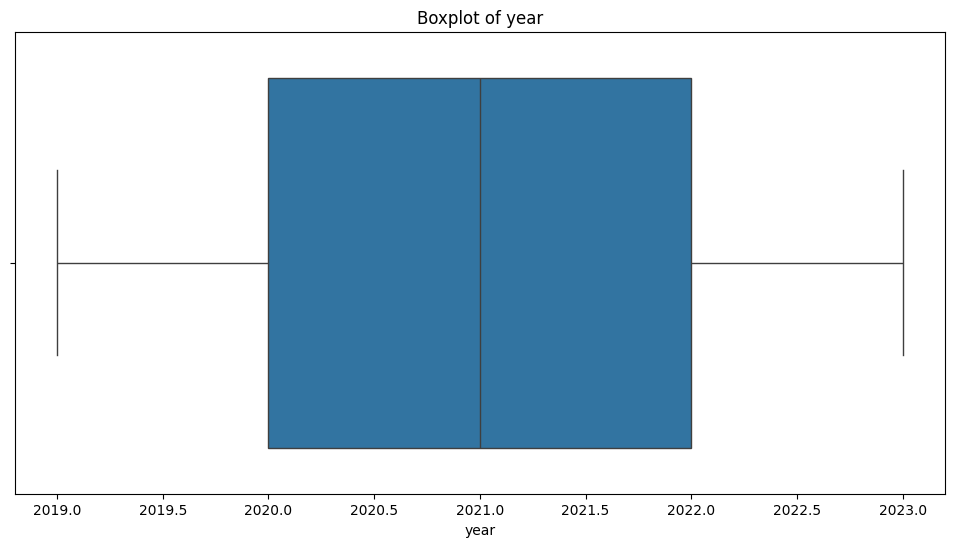

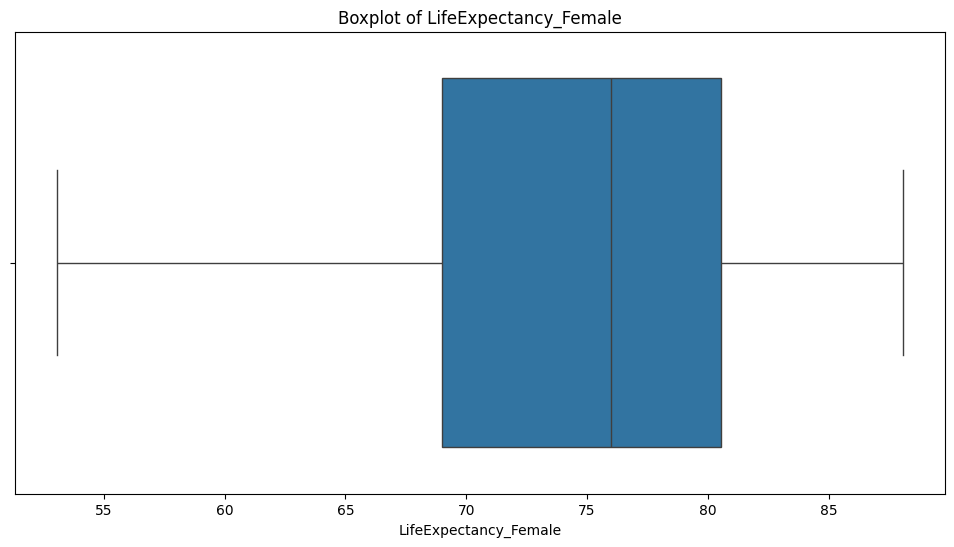

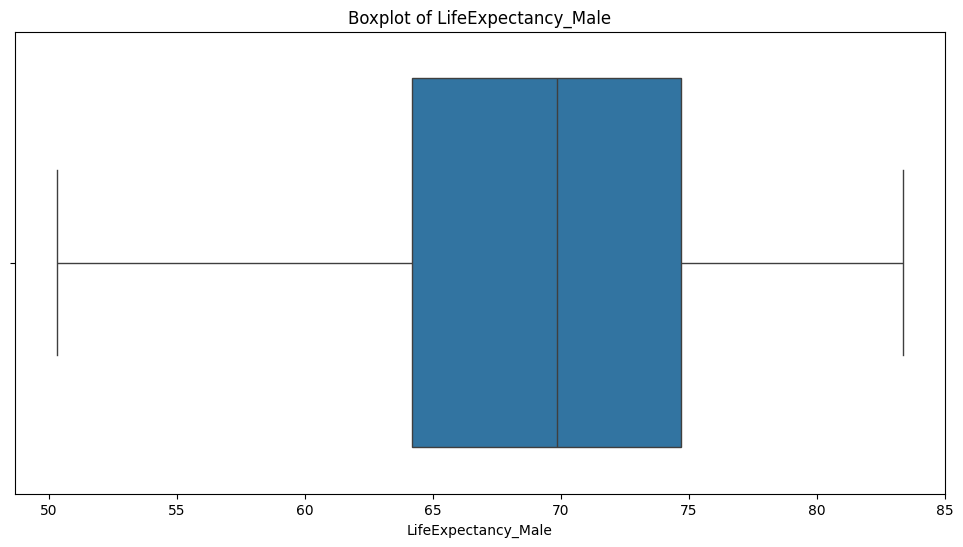

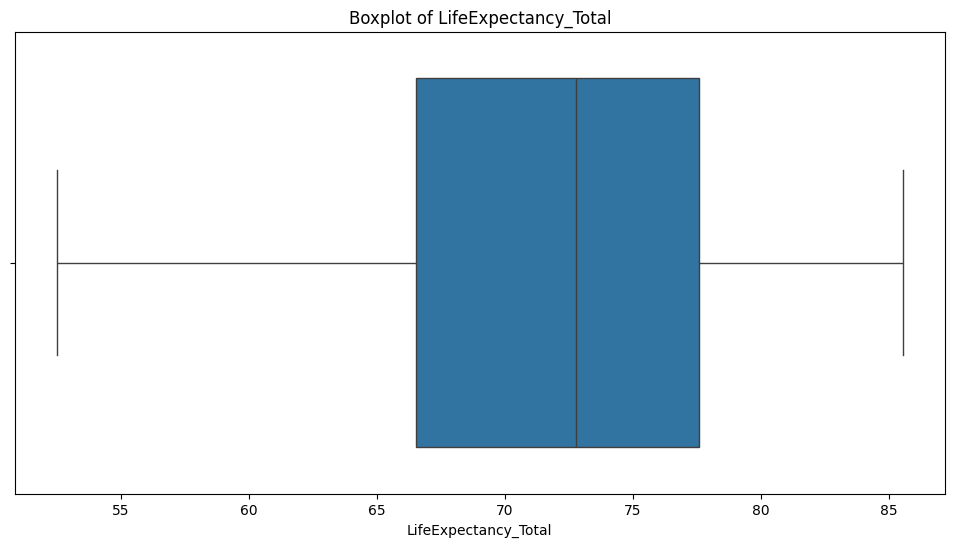

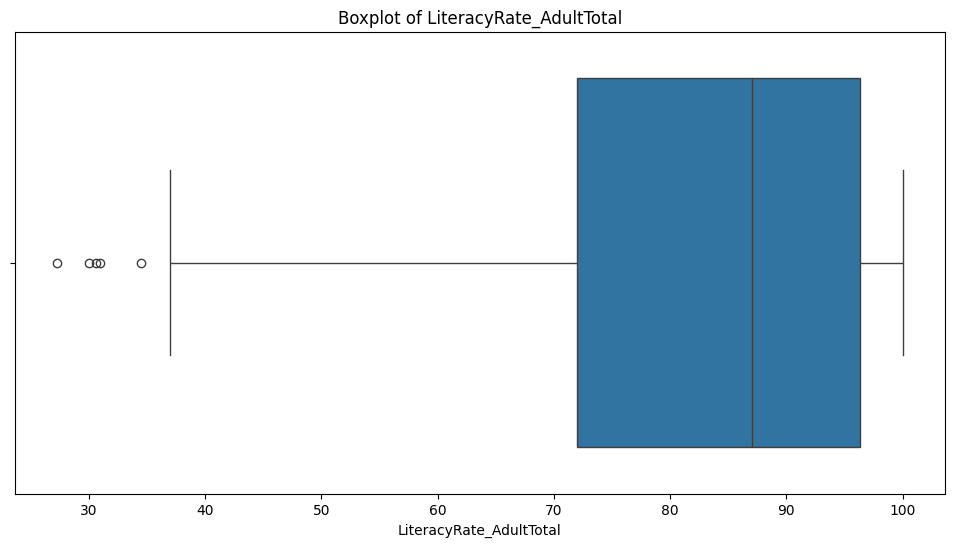

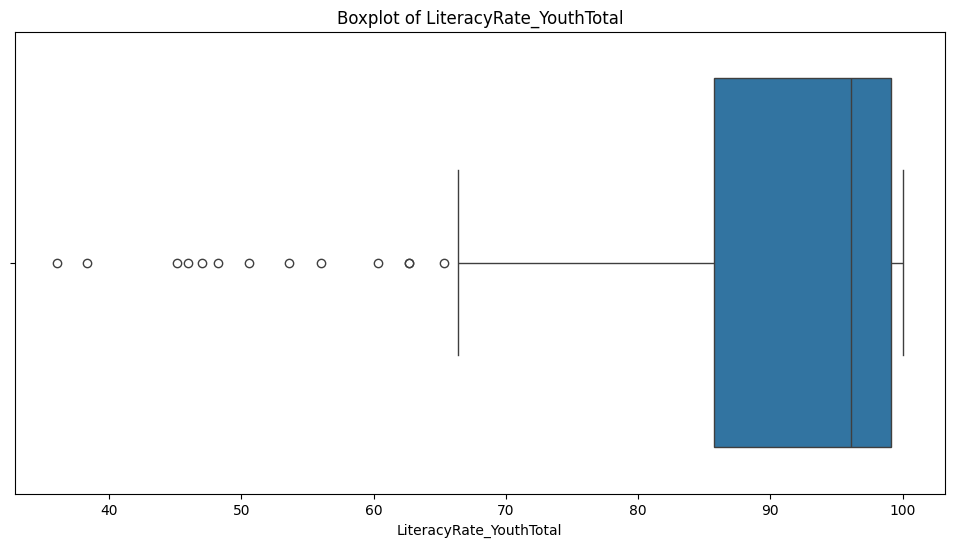

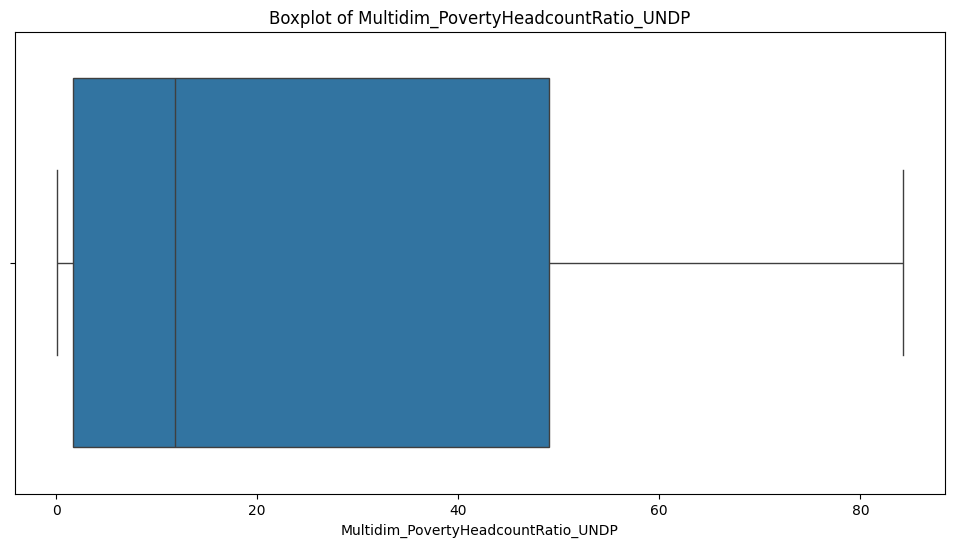

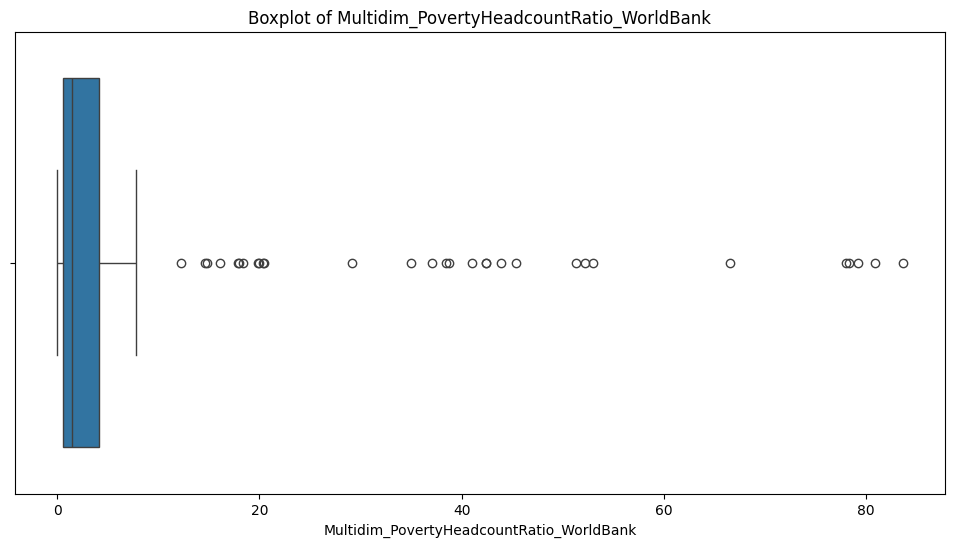

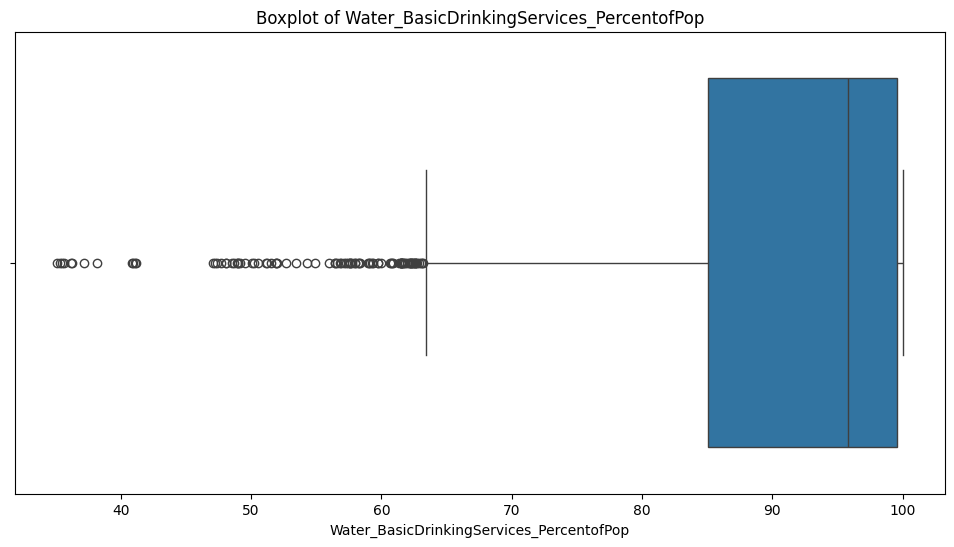

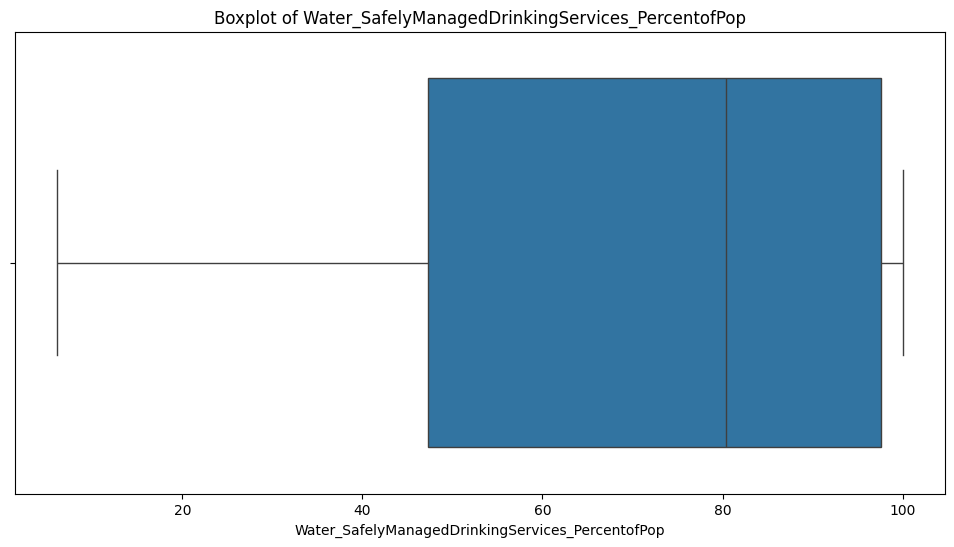

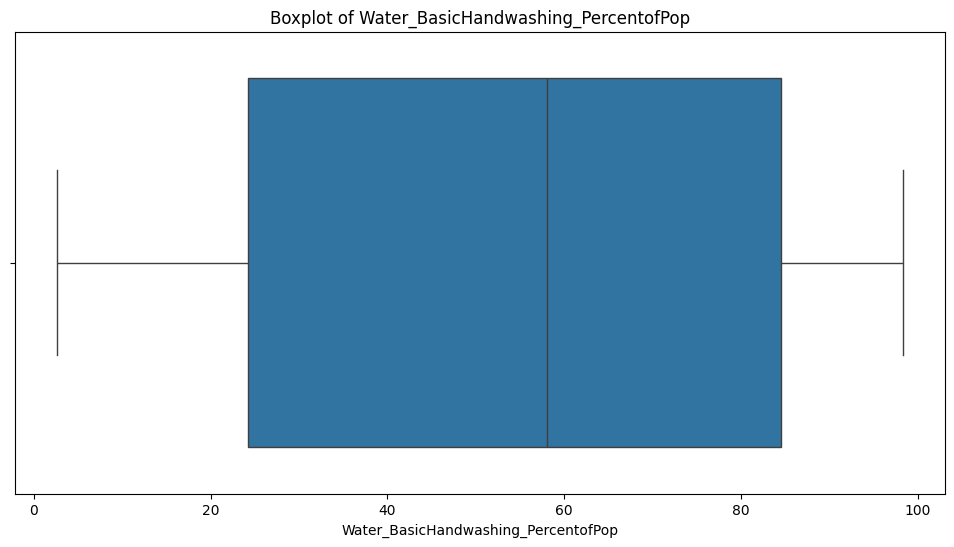

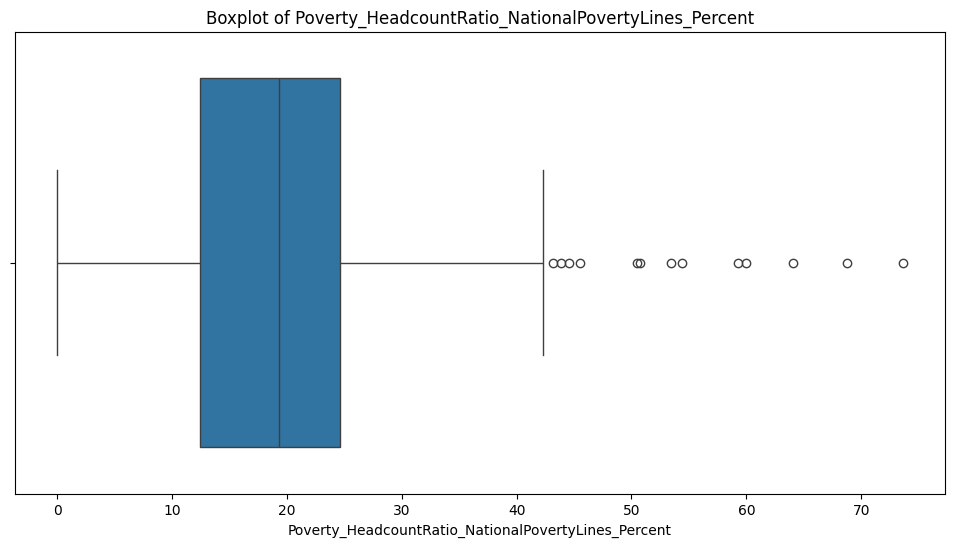

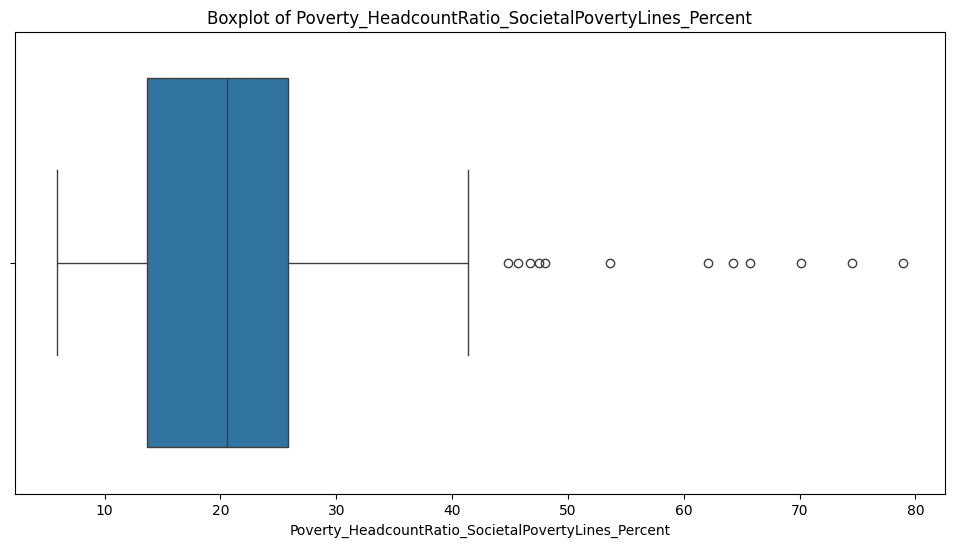

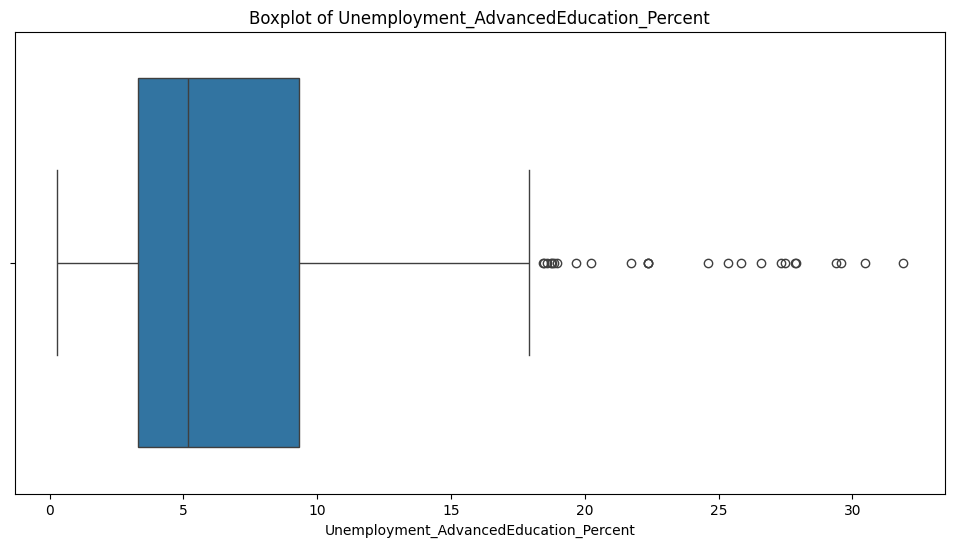

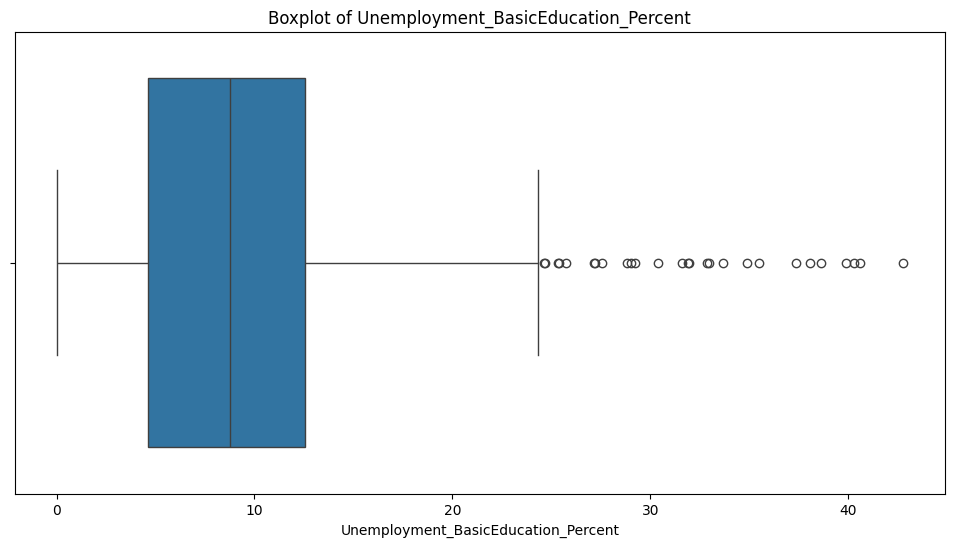

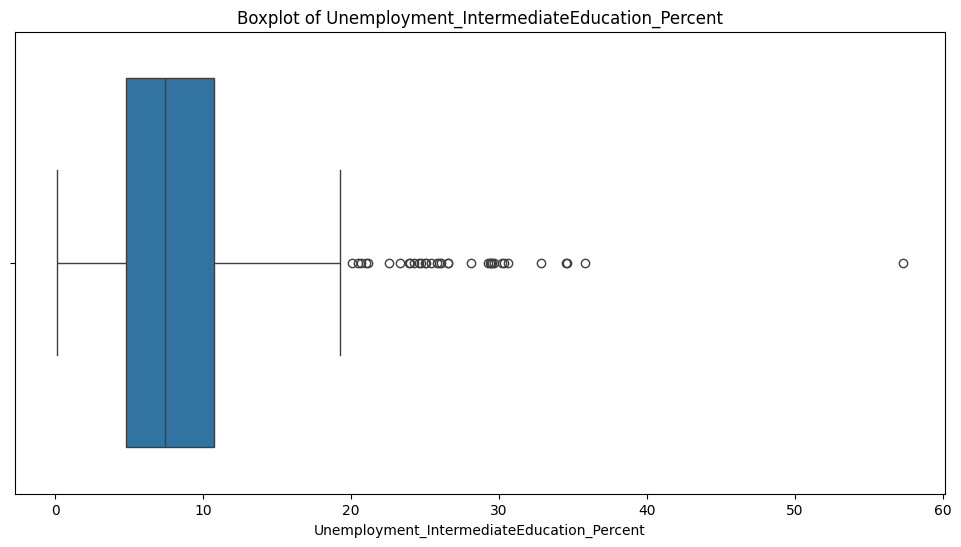

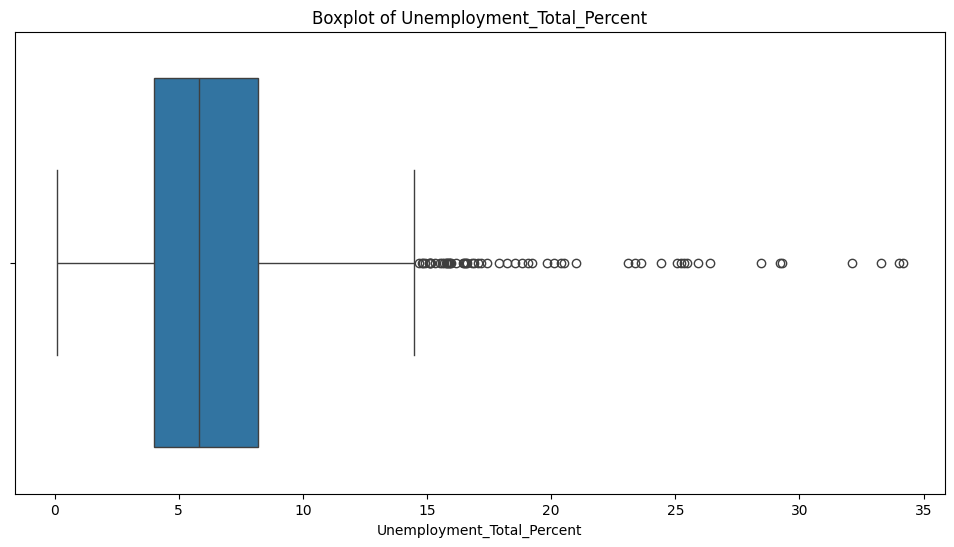

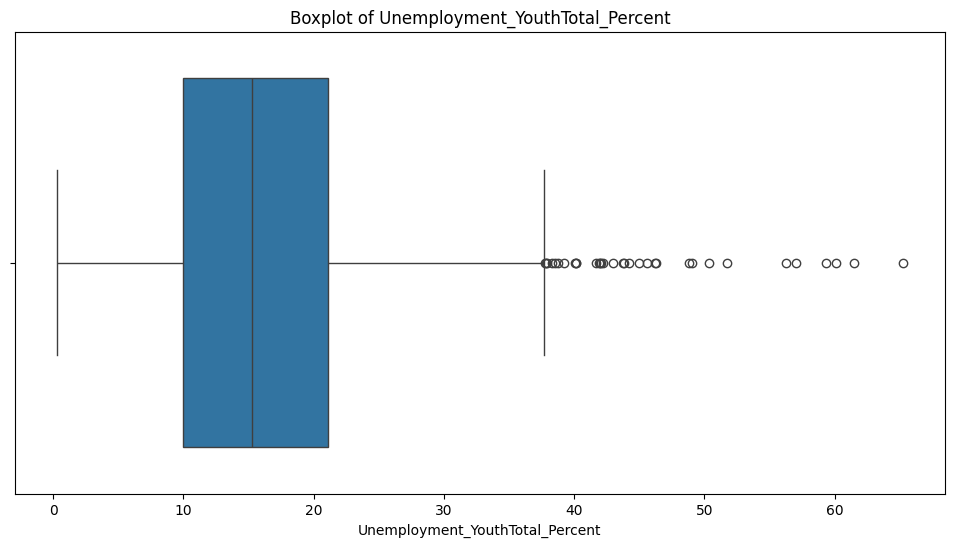

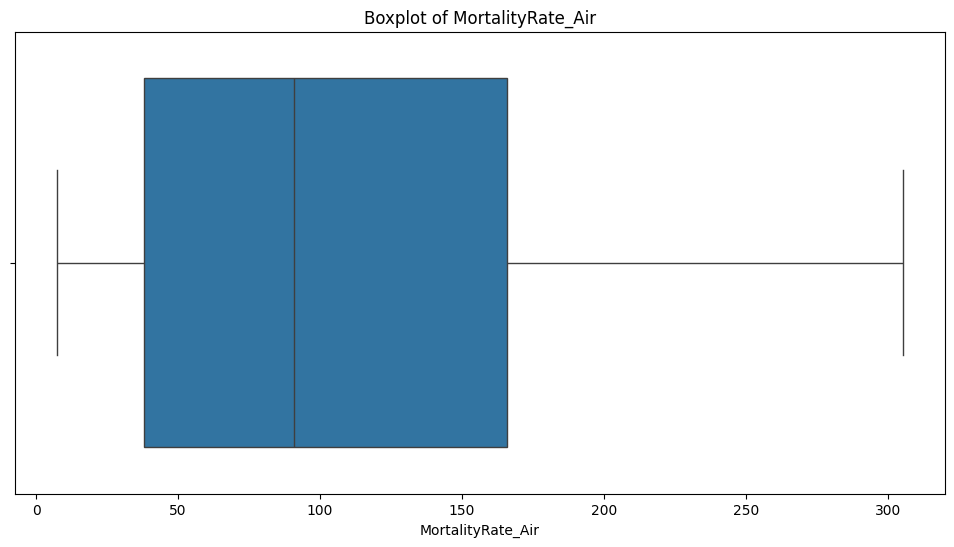

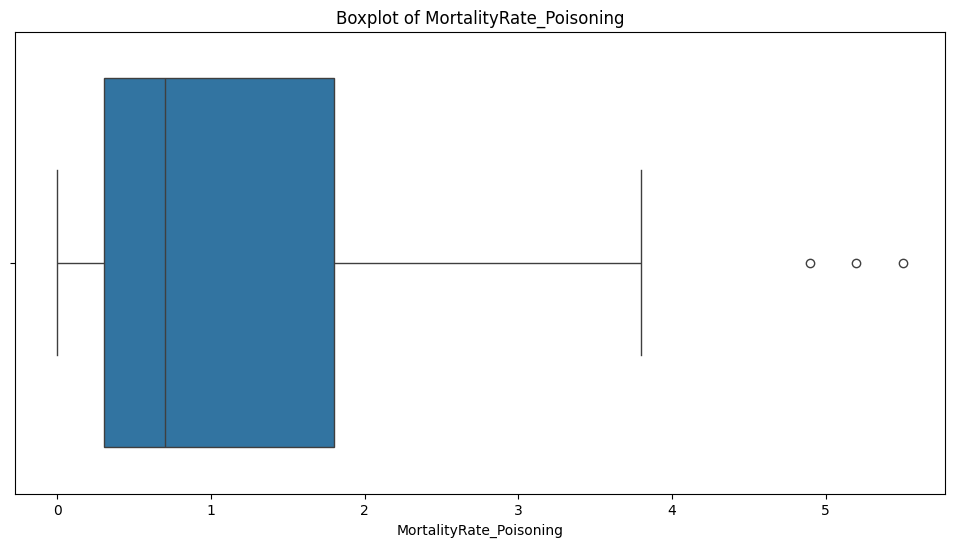

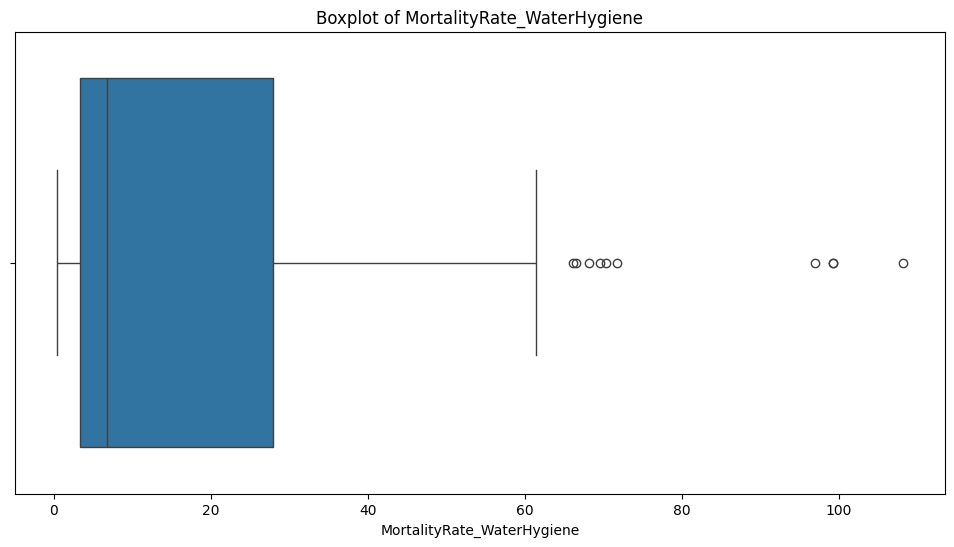

In [9]:
def plot_boxplot(data, column, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.show()

for col in numeric_cols:
    plot_boxplot(df_social, col, f"Boxplot of {col}")

In [10]:
#Preprocessing for indicator MultiDim_PovertyHeadcountRatio_UNDP
df_social[["Multidim_PovertyHeadcountRatio_UNDP"]].describe()

,Multidim_PovertyHeadcountRatio_UNDP
count,36.000000
mean,23.183333
std,25.872440
min,0.100000
25%,1.650000
50%,11.850000
75%,49.075000
max,84.200000


In [11]:
# Calculate the 95th percentile for these six inidcators
Water_BasicHandwashing_cap = df_social["Water_BasicHandwashing_PercentofPop"].quantile(0.95)
Unemployment_AdvanceEducation_cap = df_social["Unemployment_AdvancedEducation_Percent"].quantile(0.95)
Unemployment_BasicEducation_cap = df_social["Unemployment_BasicEducation_Percent"].quantile(0.95)
Unemployment_IntermediateEducation_cap = df_social["Unemployment_IntermediateEducation_Percent"].quantile(0.95)
Unemployment_Total_Per_cap = df_social["Unemployment_Total_Percent"].quantile(0.95)
Unemployment_YouthTotal_Per_cap = df_social["Unemployment_YouthTotal_Percent"].quantile(0.95)



df_social["Water_BasicHandwashing_PercentofPop"] = df_social["Water_BasicHandwashing_PercentofPop"].clip(upper=Water_BasicHandwashing_cap)
df_social["Unemployment_AdvanceEducation_Percent"] = df_social["Unemployment_AdvancedEducation_Percent"].clip(upper=Unemployment_AdvanceEducation_cap)
df_social["Unemployment_BasicEducation_Percent"] = df_social["Unemployment_BasicEducation_Percent"].clip(upper=Unemployment_BasicEducation_cap)
df_social["Unemployment_IntermediateEducation_Percent"] = df_social["Unemployment_IntermediateEducation_Percent"].clip(upper=Unemployment_IntermediateEducation_cap)
df_social["Unemployment_Total_Percent"] = df_social["Unemployment_Total_Percent"].clip(upper=Unemployment_Total_Per_cap)
df_social["Unemployment_YouthTotal_Percent"] = df_social["Unemployment_YouthTotal_Percent"].clip(upper=Unemployment_YouthTotal_Per_cap)


print(f"Water_BasicHandwashing_PercentofPop at: {Water_BasicHandwashing_cap}")
print(f"Unemployment_AdvanceEducation_Percent at: {Unemployment_AdvanceEducation_cap}")
print(f"Unemployment_BasicEducation_Percent at: {Unemployment_BasicEducation_cap}")
print(f"Unemployment_IntermediateEducation_Percent at: {Unemployment_IntermediateEducation_cap}")
print(f"Unemployment_Total_Percent at: {Unemployment_Total_Per_cap}")
print(f"Unemployment_YouthTotal_Percent at: {Unemployment_YouthTotal_Per_cap}")


Water_BasicHandwashing_PercentofPop at: 94.92320541500001
Unemployment_AdvanceEducation_Percent at: 17.561700000000002
Unemployment_BasicEducation_Percent at: 23.061
Unemployment_IntermediateEducation_Percent at: 20.677
Unemployment_Total_Percent at: 16.5361
Unemployment_YouthTotal_Percent at: 37.06789999999999


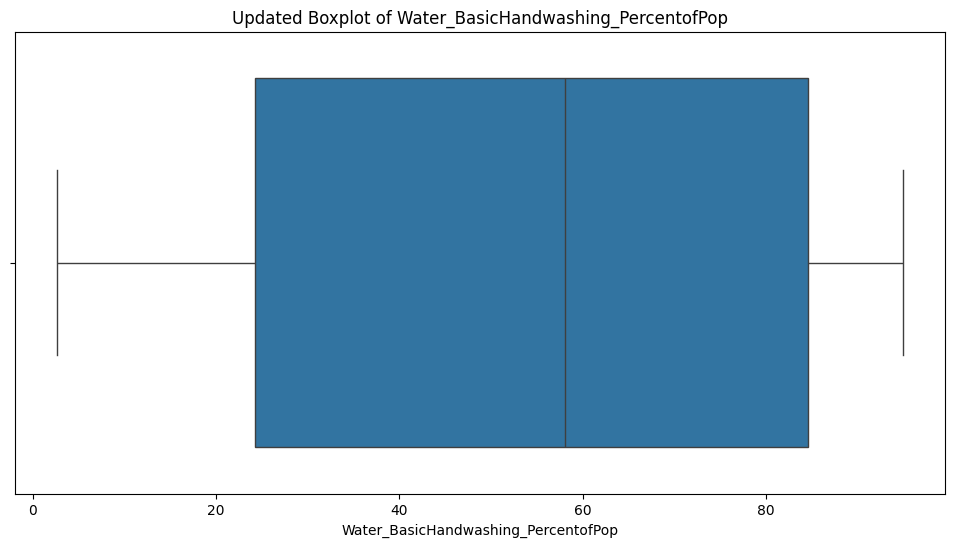

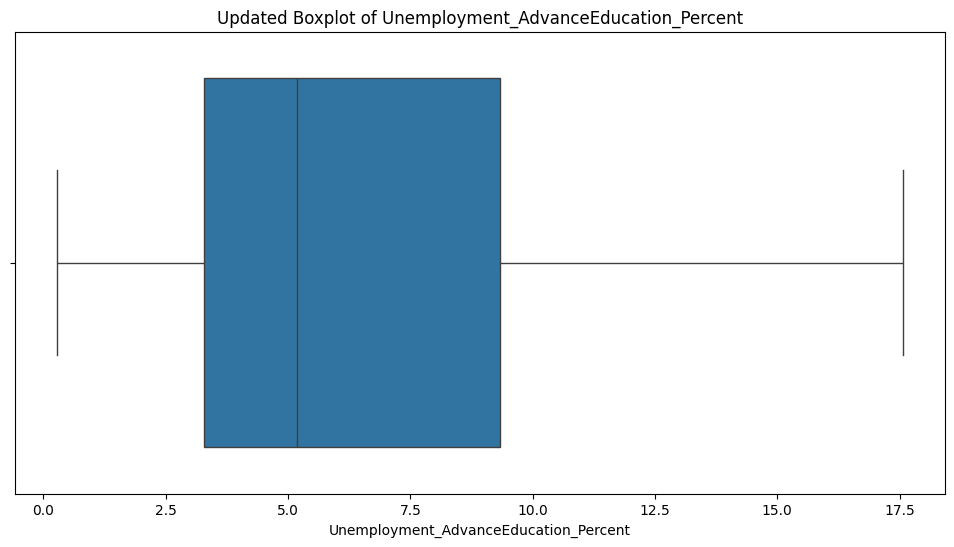

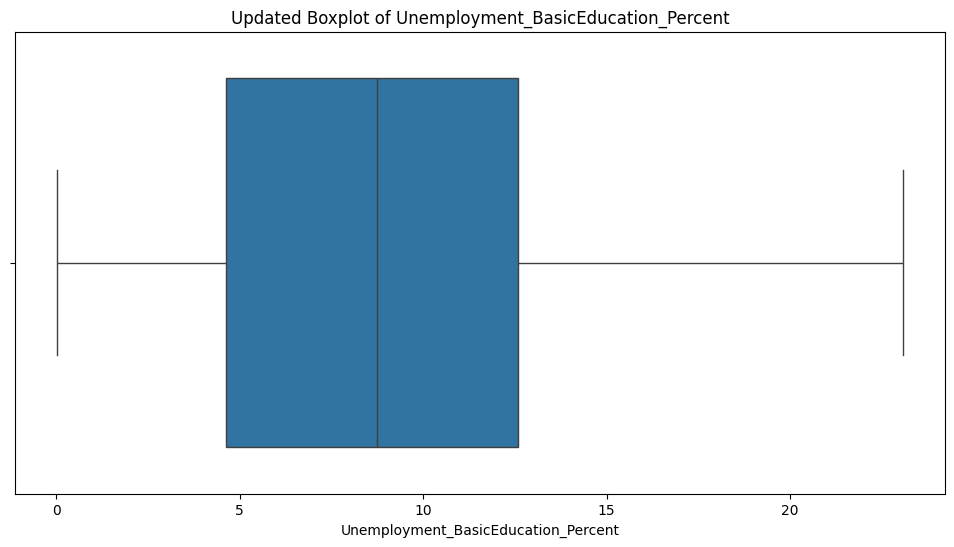

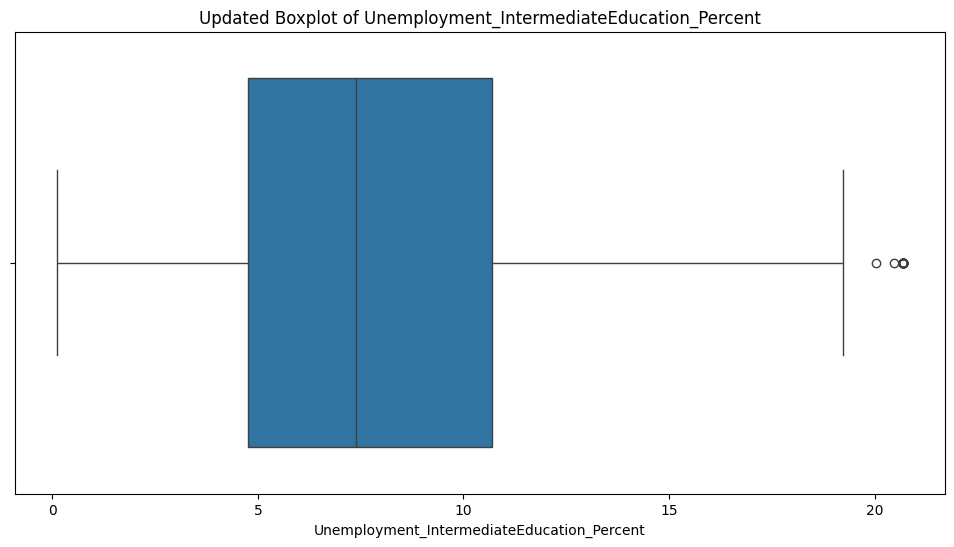

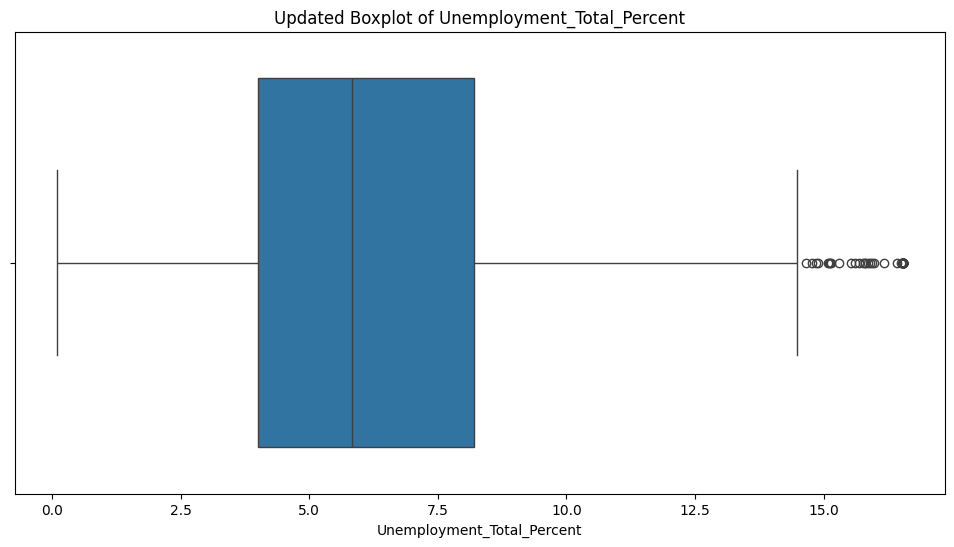

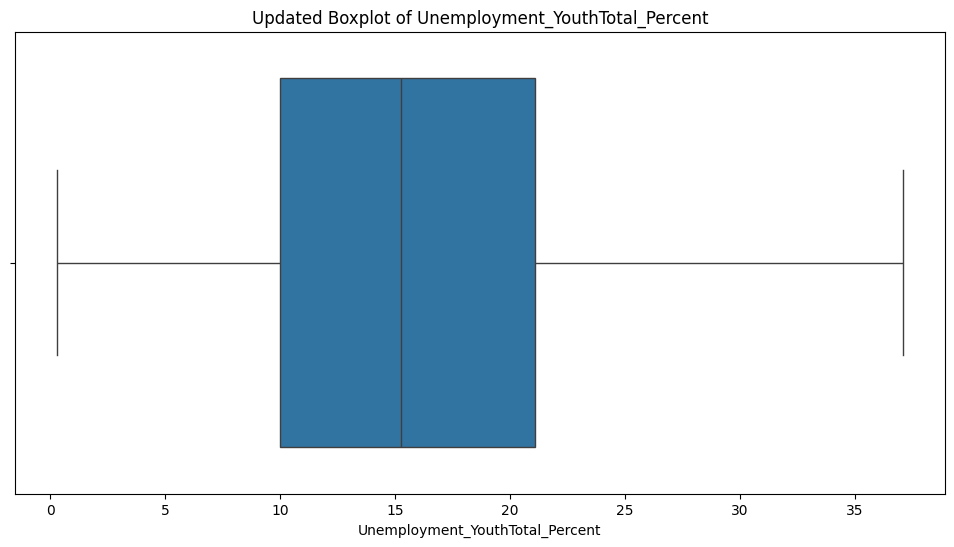

In [12]:
plot_boxplot(df_social, "Water_BasicHandwashing_PercentofPop", "Updated Boxplot of Water_BasicHandwashing_PercentofPop")
plot_boxplot(df_social, "Unemployment_AdvanceEducation_Percent", "Updated Boxplot of Unemployment_AdvanceEducation_Percent")
plot_boxplot(df_social, "Unemployment_BasicEducation_Percent", "Updated Boxplot of Unemployment_BasicEducation_Percent")
plot_boxplot(df_social, "Unemployment_IntermediateEducation_Percent", "Updated Boxplot of Unemployment_IntermediateEducation_Percent")
plot_boxplot(df_social, "Unemployment_Total_Percent", "Updated Boxplot of Unemployment_Total_Percent")
plot_boxplot(df_social, "Unemployment_YouthTotal_Percent", "Updated Boxplot of Unemployment_YouthTotal_Percent")

In [13]:
#export the updated csv file
df_social.to_csv("cleaned_social_indicators.csv", index=False)

In [ ]:
!jupyter nbconvert --to html "/content/BANA_698_Social_Indicators_Preprocessing.ipynb"

[NbConvertApp] Converting notebook /content/BANA_698_Social_Indicators_Preprocessing.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 24 image(s).
[NbConvertApp] Writing 1432106 bytes to /content/BANA_698_Social_Indicators_Preprocessing.html
